In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
#loading iris dataset
data = load_iris()
X = data.data #X inputs the flower measurements
y = data.target #y outputs the flower type as labels

#Split into training and testing data (preparing the dataset)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, #80% data for training and 20% data for testing
    random_state = 42 #
)

In [3]:
#Core part of Neural Network Model
model = models.Sequential([
    layers.Dense(10,activation='relu',input_shape=(4,)), #input layer(contains 4 values of measurements) and Hidden layer(contains 10 neurons with relu)
    layers.Dense(3,activation='softmax') #Output layer contains 3 neurons i.e 3 flower types
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
#Compile the model
model.compile(
    optimizer = 'adam', #This tells the model how to learn(adam)
    loss = 'sparse_categorical_crossentropy', #This tells the model how to measure error(classification loss)
    metrics = ['accuracy'] #This tells the model how to track accuracy
)

In [8]:
#Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    validation_split=0.1
) #Here the model sees data, then makes mistakes, then correct weights, then runs 50 or 100 times, and then shows training & validation accuracy

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7565 - loss: 0.7364 - val_accuracy: 0.9167 - val_loss: 0.6703
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8214 - loss: 0.7288 - val_accuracy: 0.9167 - val_loss: 0.6675
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8543 - loss: 0.7229 - val_accuracy: 0.9167 - val_loss: 0.6648
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8465 - loss: 0.7224 - val_accuracy: 0.9167 - val_loss: 0.6620
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8694 - loss: 0.7118 - val_accuracy: 0.9167 - val_loss: 0.6592
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8663 - loss: 0.7010 - val_accuracy: 0.9167 - val_loss: 0.6563
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8648 - loss: 0.7035 - val_accuracy: 0.9167 - val_loss: 0.6537
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8819 - loss: 0.6947 - val_accuracy: 0.9167 - val_loss:

In [9]:
#Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9667 - loss: 0.4380
Test Accuracy: 0.9666666388511658


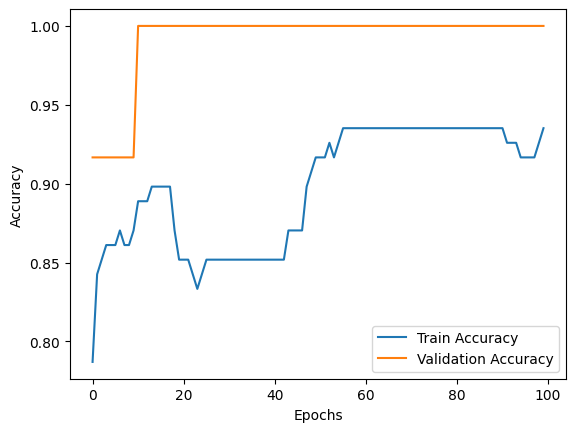

In [10]:
#Visualize training
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()